In [138]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [139]:
btc=pd.read_csv('btc.csv')

In [140]:
btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [141]:
daily_data_fb = btc.reset_index()[['Date','Closing Price (USD)']].rename({'Date':'ds','Closing Price (USD)':'y'}, axis=1)

In [153]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
mod = AutoReg(daily_data_fb['y'].to_numpy(), 10)
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2661
Model:                    AutoReg(10)   Log Likelihood              -19215.875
Method:               Conditional MLE   S.D. of innovations            340.222
Date:                Sun, 24 Jan 2021   AIC                             11.668
Time:                        21:38:49   BIC                             11.695
Sample:                            10   HQIC                            11.678
                                 2661                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1818     11.935      0.015      0.988     -23.210      23.574
y.L1           1.0400      0.072     14.357      0.000       0.898       1.182
y.L2          -0.0802      0.091     -0.880      0.3

/home/cem/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<Figure size 3456x1944 with 0 Axes>

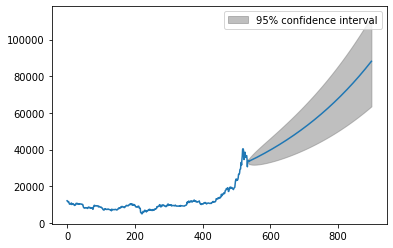

In [158]:
fig = plt.figure(figsize=(48,27))
fig = res.plot_predict(int(len(daily_data_fb['y'])*0.8),len(daily_data_fb['y'])+365)